# 1장. Matplotlib 입문

## 1-1. 기본적인 plot 3가지 (line, bar, plot)

Matplotlib은 Python에서 논문이나 출판 등에 사용할 수 있는 2차원 Plot을 만드는 라이브러리입니다. 이 외의 Python 시각화 라이브러리(`seaborn`, `ggplot` 등)은 matplotlib을 기반으로 만들어졌기에 Matplotlib을 안다면 다른 시각화 라이브러리도 더 쉽게 이해할 수 있습니다.

IPython(주피터 노트북 등)에서는 pyplot모듈을 사용하여 MATLAB와 유사한 인터페이스를 제공합니다. 

이번 장에서는 matplotlib의 기본적인 내용과 예제를 살펴보며 간단하게 맛보기를 하겠습니다.

### 1-1-1. 라이브러리 호출

`matplotlib`라이브러리와 `matplotib.pyplot` 모듈을 호출해서 사용해보겠습니다.
기본적으로 matplotlib은 행렬 및 벡터 연산 라이브러리인 `numpy`와 함께 많이 사용합니다.

그외에도 `pandas`나 `scipy` 등의 라이브러리와도 호환성이 좋으며 이는 후에 필요에 따라 설명하도록 하겠습니다.

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
print('matplotlib version : ', mpl.__version__)
print('numpy version : ', np.__version__)

matplotlib version :  3.2.2
numpy version :  1.18.5


데이터 시각화는 말 그대로 **데이터**를 **시각화**하는 작업입니다.

그렇기에 데이터 시각화를 위해서는 데이터와 시각화를 동시에 이해할 필요가 있습니다.

- **데이터** : 연속형, 이산형, 명목형, 순서형 등의 데이터의 분류 [(참고)](https://subinium.github.io/basic-of-data/)

- **시각화** : 데이터를 그래픽 요소로 매핑(mappint)

데이터 시각화의 목적은 다양하겠지만 공통적인 목적은 **원데이터(raw data)보다 좋은 설명**을 목표로 합니다. 설명은 결과적으로 비교, 분석, 의사결정, 설득 등으로 이어지게 됩니다.

하지만 원본 데이터가 아니기에 왜곡될 수 있으며 여러 문제가 생길 수 있습니다. 시각화 과정에서는 크게 4가지 포인트를 생각해봅시다.

1. **정보성** : 전하려는 **메세지**와 **맥락**에 적합한가
2. **효율성** : 시각화는 **목적**에 맞게 그려졌는가 (필요없는 내용으로 **가독성**이 흐려지지는 않았나)
3. **심미성** : 시각적으로 사람들에게 **만족스러운 UI**를 제공했는가
4. **참신성** : 사람들이 **흥미**를 가지게 데이터를 구조화하여 시각화했는가

이런 포인트를 중심으로 계속 시각화를 수정하면 됩니다. 이제 그럼 하나씩 그려봅시다.

> 우선 익숙한 2차원 직교 좌표계(또는 데카르트 좌표계)에서 그려보겠습니다. 직교 좌표계에서의 시각화는 '**x축과 y축에 어떤 내용을 표시**할 것인가'가 중요합니다.

### 1-1-2. 선 그래프 (line plot)

첫 그래프는 **선 그래프(line plot)** 를 그려보겠습니다. 꺾은 선 그래프라고도 이야기합니다.

선의 연속적인 느낌을 이용하여 변하는 내용에서 추세를 관찰하기에 적합합니다. 그래서 x축을 시간대로 y축에 그 시간대의 데이터를 사용하여 **시계열 데이터(time-series data)** 시각화에 많이 사용합니다.

시계열 데이터의 예시로는 날씨, 주식 등이 있습니다.

이번에는 학점 데이터를 가지고 시각화해보겠습니다. 1학기부터 6학기까지의 성적입니다.

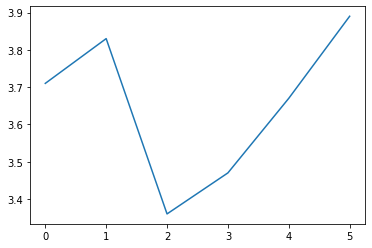

In [8]:
grade = np.array([3.71, 3.83, 3.36, 3.47, 3.67, 3.89]) # 성적 데이터
plt.plot(grade) # 선 그래프

`plt.plot`은 y값만 담아도 그려지며 이 때 x축은 자연스럽게 0부터 연속적인 값을 제공합니다.
그럼 여기서 x축도 함께 담아 축을 수정해보겠습니다.

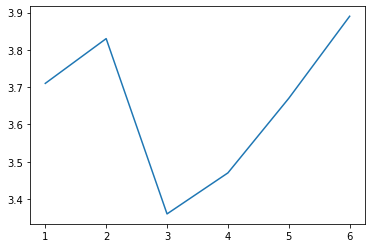

In [11]:
grade = np.array([3.71, 3.83, 3.36, 3.47, 3.67, 3.89]) # 성적 데이터
semester = np.array([1, 2, 3, 4, 5, 6]) # 학기
plt.plot(semester, grade) # 선 그래프

이렇게 x축과 y축을 정의하여 쉽게 선 그래프를 그렸습니다. 

**고민해볼 포인트**

1. 선 그래프에서는 어떤 내용을 바꿔볼 수 있을까?
2. x축과 y축은 제대로 설정되어 있는걸까? 비율이 달라진다면?
3. 제 3자는 위의 설명없이 저 그래프를 이해할 수 있을까? 
4. 필요한 정보와 있으면 좋을 정보는 각각 뭐가 있을까?

### 1-1-3. 막대 그래프 (bar plot)

**막대 그래프(bar plot)** 는 말 그대로 막대로 그래프를 표현합니다. 선 그래프보다 크기 비교가 쉽고, 선 그래프가 연속적이라면 막대는 이산적이라 각각의 장점이 있습니다.

물론 연속적인 데이터도 막대로 표현할 수 있는데 이는 **히스토그램(histogram)** 이라고 부릅니다. 이는 후에 살펴보겠습니다.

이번에는 성적표 알파벳 개수로 막대 그래프를 그려보겠습니다.

|Grade|#|
|-|-|
|A+| 14|
|A | 13|
|B+| 13|
|B | 11|
|C+|  1|
|C |  2|
|D+|  0|
|D |  1|
|F |  1|

<BarContainer object of 9 artists>

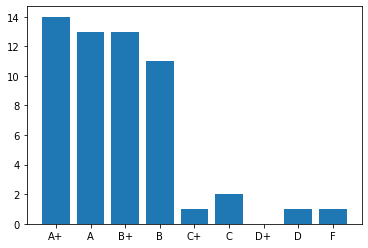

In [12]:
# 성적 알파벳과 개수
alphabet = np.array(['A+', 'A', 'B+', 'B', 'C+', 'C', 'D+', 'D', 'F']) 
count = np.array([14,13,13,11,1,2,0,1,1])
plt.bar(alphabet, count)

막대 그래프는 `plt.bar`를 사용하여 그릴 수 있습니다.

`plt.bar`도 `plt.plot`과 마찬가지로 y값들만 넣어줘도 됩니다.
그리고 `plt.plot`도 x축에 텍스트를 넣어도 됩니다.

동일한 데이터로 선그래프를 그려보면 다음과 같습니다.

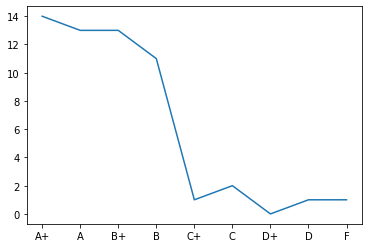

In [14]:
plt.plot(alphabet, count)

선 그래프도 이웃된 값들에서는 크기비교가 되지만 'C+'과 'F' 등을 보면 확실히 비교가 어려운 것을 알 수 있습니다. 

막대 그래프는 세로로 그리는 경우가 있습니다. 보통 category의 개수가 많아지면 가로 길이에 표기하기에는 한계가 있어 세로로 그리게 됩니다.

<BarContainer object of 9 artists>

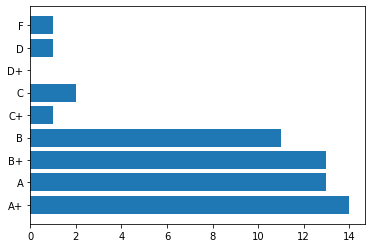

In [18]:
plt.barh(alphabet, count)

`plt.barh`를 사용하여 세로 막대 그래프를 그립니다. 처음 막대그래프에서 축만 바꿔그렸는데 가독성의 차이가 느껴지시나요? 

**고민해볼 포인트**

1. 막대 그래프와 선그래프를 같이 사용할 수 있을까? 어떤 상황에서 사용할까?
2. 막대 그래프에서는 어떻게 색을 활용할 있을까?
3. 2개 이상의 막대그래프를 합치는 방법에는 어떤게 있을까?
4. 막대의 모양은 반드시 직사각형이어야 할까?
5. 막대 그래프에서 x축은 어떻게 정렬하는게 좋을까?

### 1-1-4. 산점도 (scatter plot)

지금까지 선, 면으로 그래프를 그렸습니다. 이번에는 점을 사용하여 그래프를 그려보겠습니다.

점은 가장 기본적인 요소이기에 다양하게 활용할 수 있습니다. 예를 들면 기존의 선그래프에서 각 점을 확실하게 포인팅해줄 수 있는 역할을 해줄 수 있습니다.

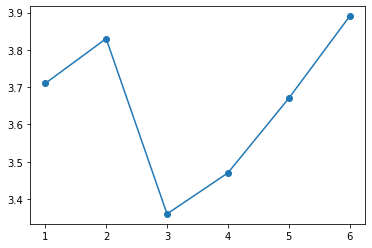

In [20]:
# 학기별 성적 데이터
plt.plot(semester, grade)
plt.scatter(semester, grade)

보통 점을 활용하기에 가장 좋은 그래프는 **산점도(scatter plot)** 입니다. x축과 y축에 매칭되는 점들을 그리며 전체적인 관계를 살펴보는 것입니다.

앞으로 데이터의 분포를 살피기 위해 많이 사용할 그래프입니다. 만약 x값과 y값이 둘 다 정규분포면 어떻게 될까요?

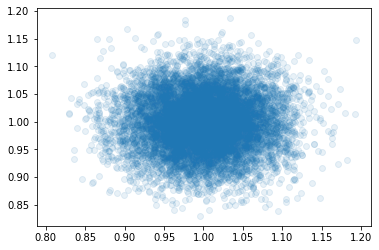

In [35]:
N, mu, sigma = 10000, 1, 0.05 #개수, 평균, 표준편차
x = np.random.normal(mu, sigma, N) # 정규분포
y = np.random.normal(mu, sigma, N)
plt.scatter(x, y, alpha=0.1) # alpha는 투명도

산점도는 `plt.scatter`를 이용하여 그릴 수 있습니다.

다음과 같이 중앙에 몰려있는 분포를 볼 수 있을거고, 아마 막대그래프나 히스토그램을 같이 사용하여 x의 분포와 y의 분포를 따로 살펴보아도 좋을 것입니다.

이렇게 2차원에 점들을 통해 점들간의 집합(cluster)이 있는지, 분포는 어떻게 되는지 등을 살피며 데이터를 더 이해할 수 있을겁니다.

**생각해볼 포인트**

1. 점은 꼭 작은 동그라미여야 할까? 모양, 색, 크기는?
2. 점을 그릴 때 뒤에 배경이 직교좌표계가 아니라면? (ex. 지도)

### 1-1-5. 마무리

이번에는 총 다음 함수를 살펴보았습니다. 

- `plt.plot`
- `plt.bar` / `plt.barh`
- `plt.scatter`

이제 그래픽 요소 **점, 선, 면**을 다루게 되었습니다.

하지만 `pyplot` 방식 외에도 matplotlib은 더 다양한 모듈이 있고, 더 고급진 시각화를 위해서는 **객체지향 API**를 이해해야 합니다.
다음에는 matplotlib을 이해하기 위해 API를 살펴봅시다.